## 2. Descriptive Analysis
For descriptive analysis, predominantly Pandas is used for data transformation, in conjunction with some useful visualization libraries, which help understanding of the obtained data.

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import seaborn as sns
import statsmodels.api as sm

def parse_time_value(time_string):
    # Parse the time string value and interpret it in seconds
    time_split = time_string.split(':')
    return int(time_split[0]) * 60.0 + float(time_split[1])

# Set some specs for plotting
%matplotlib inline
mpl.rcParams['figure.figsize'] = (16.0, 8.0)
mpl.style.use('ggplot')
plt.rcParams['font.family'] = 'IPAGothic'

# Read data from the data folder
race_df = pd.read_csv('data/race.csv', low_memory=False, index_col=0)
horse_df = pd.read_csv('data/horse.csv', low_memory=False, index_col=0)
individual_df = pd.read_csv('data/individual.csv', low_memory=False, index_col=0)
trainer_df = pd.read_csv('data/trainer.csv', low_memory=False, index_col=0)
jockey_df = pd.read_csv('data/jockey.csv', low_memory=False, index_col=0)

## 2.1 Race

### 2.1.1 Race Dataframe 

In [2]:
# Do some type transformation for certain columns
race_df['run_time'] = race_df['run_time'].apply(lambda x: parse_time_value(x))
race_df['distance'] = race_df['distance'].apply(lambda x: re.search(r'(\d+)m', x).group(1)).astype(int)

# Overview of the dataframe structure
race_df.sample(n=5).T

,225716,273822,199560,3304,93926
run_date,2004-10-30,2005-09-24,2004-04-17,2000-02-06,2002-02-09
place,京都,中山,福島,京都,小倉
race,7R,3R,2R,12R,11R
title,3歳上500万下,3歳未勝利,3歳未勝利,4歳上900万下,皿倉山特別(1000万下)
type,ダ,ダ,ダ,ダ,芝
track,右,右,右,右,右
distance,1200,1200,1700,1800,2600
weather,小雨,小雨,晴,雨,曇
condition,良,重,良,不良,良
time,13:30,11:00,10:20,16:20,15:30


In [3]:
# Describe the numerical variables
race_df.describe()

,distance,bracket,horse_number,jockey_weight,run_time,win_odds,win_fav
count,376943.000000,376943.000000,376943.000000,376943.000000,376943.000000,376943.000000,376943.000000
mean,1610.870768,4.780179,7.735827,54.872268,100.496935,64.689108,7.706303
std,439.892528,2.263418,4.384175,1.842773,30.520783,92.946368,4.382195
min,1000.000000,1.000000,1.000000,48.000000,53.700000,1.000000,1.000000
25%,1200.000000,3.000000,4.000000,54.000000,74.400000,8.700000,4.000000
50%,1600.000000,5.000000,8.000000,55.000000,98.700000,25.900000,7.000000
75%,1800.000000,7.000000,11.000000,56.000000,114.800000,81.300000,11.000000
max,4250.000000,8.000000,18.000000,66.000000,308.100000,999.900000,176.900000


### 2.1.2 Race Condition 

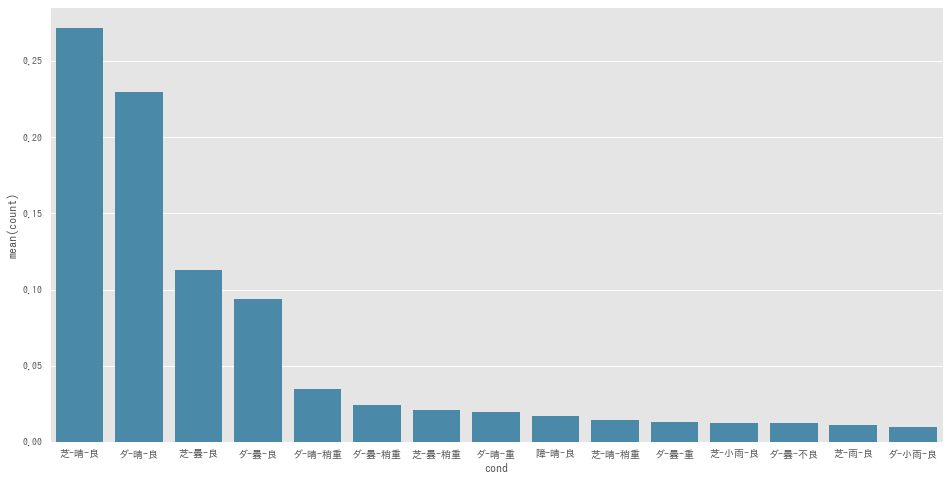

In [4]:
# Count the different race conditions
race_count = race_df.groupby(['type', 'weather', 'condition']).agg({'run_date': 'count'}).reset_index()
race_count.columns = ['type', 'weather', 'condition', 'count']
race_count['count'] = race_count['count'] / race_count['count'].sum()
race_count['cond'] = race_count['type'].str.cat(race_count['weather'], sep='-').str.cat(race_count['condition'], sep='-')
race_count_sorted = race_count.sort_values('count', ascending=False)[:15]
sns.barplot(y='count', x='cond', data=race_count_sorted, color='#3A8FB7')

### 2.1.3 Time and Distance

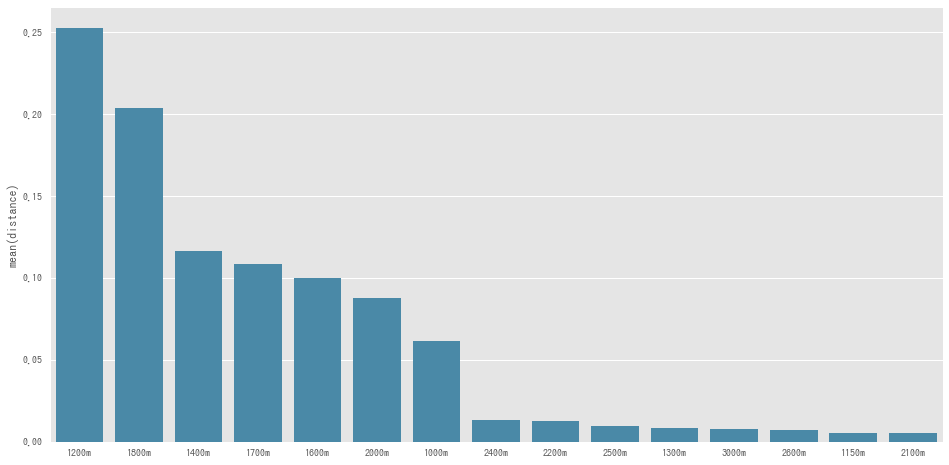

In [5]:
# Get the top run distance among the events
distance_count = race_df['distance'].value_counts()[:15]
distance_count.index = list(map(lambda x: '%sm' % str(x), distance_count.index))
sns.barplot(x=distance_count.index, y=distance_count/distance_count.sum(), color='#3A8FB7')

                            OLS Regression Results                            
Dep. Variable:               run_time   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.851e+08
Date:                Thu, 01 Feb 2018   Prob (F-statistic):               0.00
Time:                        13:30:17   Log-Likelihood:            -1.1209e+06
No. Observations:              376943   AIC:                         2.242e+06
Df Residuals:                  376942   BIC:                         2.242e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
distance       0.0628   4.62e-06   1.36e+04      0.0

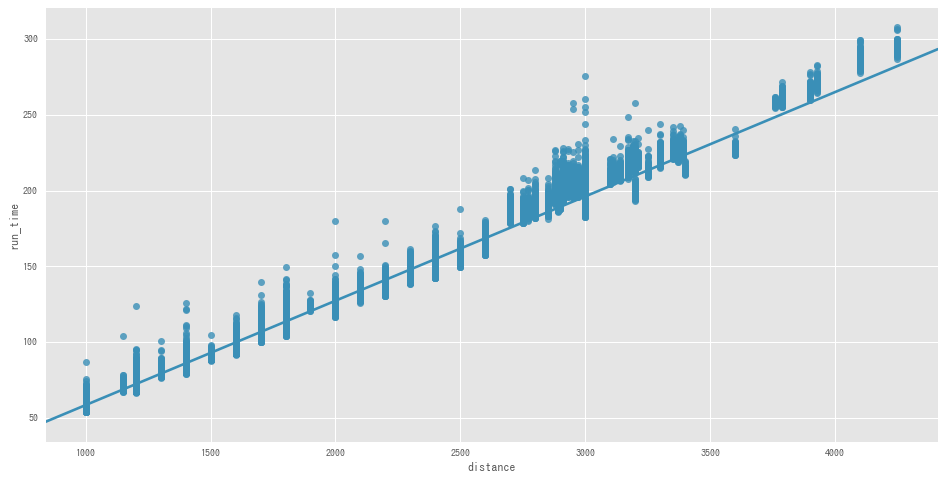

In [6]:
# Get the relationship between time and distance
dist_time = sm.OLS(race_df['run_time'], race_df['distance'])
dist_time_re = dist_time.fit()
print(dist_time_re.summary())
sns.regplot(y='run_time', x='distance', data=race_df, color='#3A8FB7')

## 2.2 Horse

### 2.2.1 Horse Dataframe 

In [7]:
# Do some type transformation for certain columns
horse_df['gender'] = horse_df['gender'].apply(lambda x: x[0])

# Overview of the dataframe structure
horse_df.sample(n=5).T

,12517,24134,28046,20067,40009
horse_name,リュウファルコン,ビッグファントム,エイシンチャンドラ,ランドアタック,タマノコシ
date_of_birth,1999年4月9日,2002年5月4日,2003年3月6日,2000年4月12日,2005年3月2日
trainer,平沢芳三 (地方),中尾正 (栗東),宮本博 (栗東),橋本忠男 (兵庫),吉田直弘 (栗東)
owner,有ムカワベルモントフ,小林昌志,平井豊光,木村昌三,北側雅司
breeder,ヒダカファーム,市川ファーム,Nancy S. Dillman,日西牧場,目黒牧場
place_of_birth,浦河町,浦河町,米,門別町,門別町
transaction_price,-,-,-,-,-
prize_obtained,315万円 (中央) /2万円 (地方),"3,326万円 (中央)","5,084万円 (中央)",188万円 (地方),0万円
race_record,15戦0勝 [ 0-0-0-15 ],19戦2勝 [ 2-4-1-12 ],22戦3勝 [ 3-4-2-13 ],33戦3勝 [ 3-3-1-26 ],4戦0勝 [ 0-0-0-4 ]
highlight_race,NaN,05'あざみ賞(500万下),07'壇之浦特別(1000万下),C41 3歳以上,NaN


In [8]:
# Describe the columns of the dataframe
horse_df.describe().T

,count,unique,top,freq
horse_name,40335,40335,カイパーベルト,1
date_of_birth,40335,2136,2002年4月3日,72
trainer,40335,1533,和田正道 (美浦),186
owner,40334,4979,社台レースホース,616
breeder,40320,3295,社台ファーム,1518
place_of_birth,40335,93,浦河町,7702
transaction_price,40335,3492,-,33686
prize_obtained,40335,18439,0万円,6476
race_record,40335,14251,2戦0勝 [ 0-0-0-2 ],1453
highlight_race,27463,8076,C2,583


### 2.2.2 Gender and Breed 

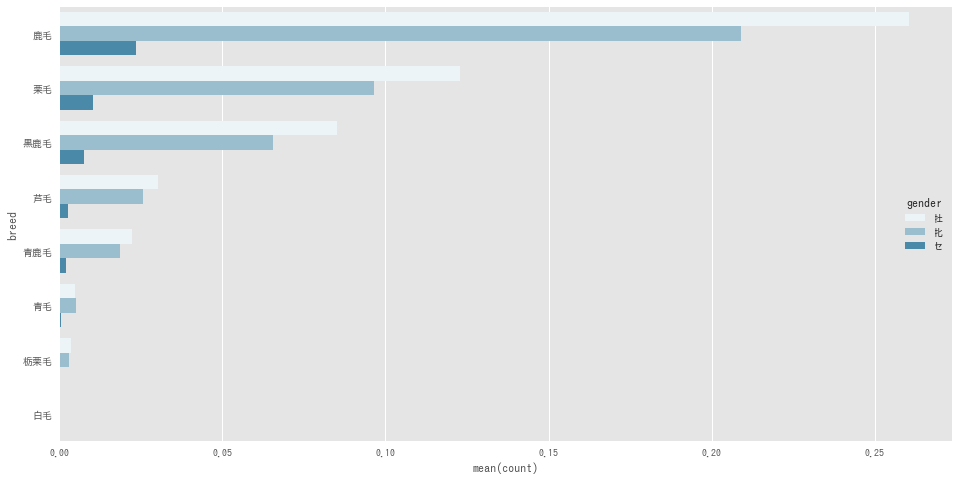

In [9]:
# Get gender and breed information
breed_gender_count = horse_df.groupby(['breed', 'gender']).agg({'horse_name': 'count'}).reset_index()
breed_gender_count.columns = ['breed', 'gender', 'count']
breed_gender_count = breed_gender_count.sort_values('count', ascending=False)
breed_gender_count['count'] = breed_gender_count['count'] / breed_gender_count['count'].sum()
sns.barplot(x='count', y='breed', data=breed_gender_count, color='#3A8FB7', hue='gender')

## 2.3 Individuals

In [10]:
# Do some type transformation for certain columns
for columns in list(individual_df.columns)[2:-1]:
    individual_df[columns] = individual_df[columns].apply(lambda x: x.replace(',', '') 
                                                          if type(x) not in [int, float] else x).astype(float)

# Overview of the dataframe structure
individual_df.sample(n=5).T

,71640,52465,1385,19550,21733
individual_type,馬主,生産者,調教師,生産者,騎手
name,藤田衛成,Coal Creek Farm,[西]増本豊,高橋ファーム,安田康彦
year,2010,1998,2002,1988,1991
rank,577,860,74,368,50
first,1,1,17,4,21
second,2,1,7,0,31
third,1,2,15,1,28
out,4,6,146,5,261
races_major,0,0,8,0,2
wins_major,0,0,0,0,0


In [11]:
# Describe the columns of the dataframe
individual_df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,88047.0,2001.490692,8.093176,1986.0,1995.0,2002.000,2007.000,2018.0
rank,88047.0,632.813577,456.464842,1.0,198.0,572.000,1051.000,1547.0
first,88047.0,4.069406,11.471869,0.0,0.0,1.000,3.000,592.0
second,88047.0,4.052347,10.528719,0.0,0.0,1.000,4.000,517.0
third,88047.0,4.044840,9.913485,0.0,0.0,1.000,4.000,437.0
out,88047.0,41.074869,85.794655,0.0,4.0,12.000,35.000,3390.0
races_major,88047.0,2.145933,7.584938,0.0,0.0,0.000,1.000,476.0
wins_major,88047.0,0.152044,0.827689,0.0,0.0,0.000,0.000,51.0
races_special,88047.0,12.131282,30.364732,0.0,0.0,3.000,10.000,1423.0
wins_special,88047.0,0.945654,3.147364,0.0,0.0,0.000,1.000,170.0


## 2.4 Jockey and Trainer Profile 

In [12]:
# Do some type transformation for certain columns
for columns in trainer_df.columns:
    trainer_df[columns] = trainer_df[columns].apply(lambda x: np.nan if x == 'null' else x)

for columns in jockey_df.columns:
    jockey_df[columns] = jockey_df[columns].apply(lambda x: np.nan if x == 'null' else x)
    if columns in ['height', 'weight']:
        jockey_df[columns] = jockey_df[columns].apply(lambda x: x if pd.isnull(x) else re.search(r'\d+', x).group(0))
        jockey_df[columns] = jockey_df[columns].astype(float)

# Overview of the dataframe structure
trainer_df.sample(n=5).T

,794,739,360,773,488
trainer_name,[外]ジャニア,[地]小野寺孝,[地]武田広臣,[西]平田修,[地]新田守
date_of_birth,1947/06/13,1938/03/20,1937/02/26,1960/05/29,1957/02/18
place_of_birth,地方,地方,地方,地方,地方
first_run_date,NaN,NaN,NaN,2006/03/05,NaN
first_run_horse,NaN,NaN,NaN,サンエムテイオー,NaN
first_win_date,NaN,NaN,NaN,2006/04/23,NaN
first_win_horse,NaN,NaN,NaN,ゼッツー,NaN


In [13]:
# Overview of the dataframe structure
jockey_df.sample(n=5).T

,226,341,22,143,556
jockey_name,東川公則,蔵重浩一,内山正博,土谷智紀,中村将之
date_of_birth,1969/09/06,1971/12/10,1963/03/19,1973/02/16,1986/10/09
place_of_birth,地方,地方,地方,静岡県,愛知県
blood_type,NaN,NaN,NaN,A型,B型
height,NaN,NaN,NaN,162,162
weight,NaN,NaN,NaN,52,45
first_flat_run_date,1998/12/26,2000/11/25,1984/03/03,1991/03/02,2005/03/05
first_flat_run_horse,ルイボスオーク,イエスマン,マーメードハット,メークアターナ,メディアブリッツ
first_flat_win_date,2003/12/14,NaN,1984/03/31,1991/04/28,2005/05/22
first_flat_win_horse,ミツアキタービン,NaN,ギフトイチバン,レディクーリア,ブレッザ


In [14]:
# Describe the columns of the dataframe
trainer_df.describe().T

,count,unique,top,freq
trainer_name,839,839,[西]梅内忍,1
date_of_birth,839,810,1956/10/09,2
place_of_birth,839,36,地方,617
first_run_date,220,153,1999/03/06,8
first_run_horse,220,220,ベロナスポート,1
first_win_date,220,208,1999/04/04,3
first_win_horse,220,220,ミンドソニー,1


In [15]:
# Describe the columns of the dataframe
jockey_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
jockey_name,632,632,松本隆宏,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_of_birth,632,616,1982/03/23,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
place_of_birth,632,36,地方,437,NaN,NaN,NaN,NaN,NaN,NaN,NaN
blood_type,193,4,A型,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
height,195,NaN,NaN,NaN,161.472,4.10343,149,159,162,164,174
weight,195,NaN,NaN,NaN,48.6256,2.98421,44,46,48,51,59
first_flat_run_date,599,337,1996/03/02,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first_flat_run_horse,599,591,イズミチケット,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first_flat_win_date,367,331,1994/03/05,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first_flat_win_horse,367,365,タマルファイター,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
